In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import emoji
import contractions
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
# Load dataset
file_path = r"C:\Users\Dee\OneDrive - Asia Pacific University\Desktop\fyp dataset\Merged_COVID19_Data.csv"
df = pd.read_csv(file_path)

Variable Information

In [8]:
print("Dataset Description:")
print(df.describe(include='all'))

Dataset Description:
                                                 news_url  \
count                                                4461   
unique                                               4189   
top     https://www.healthline.com/health-news/rural-a...   
freq                                                    4   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                    title  \
count                                                4504   
unique                                               4312   
top     Rural America Could Be the Region Hardest Hit ...   
fr

In [9]:
# Display basic info
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4504 entries, 0 to 4503
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   news_url       4461 non-null   object
 1   title          4504 non-null   object
 2   content        3581 non-null   object
 3   publish_date   1006 non-null   object
 4   meta_keywords  4022 non-null   object
 5   label          4504 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 211.3+ KB


None

,news_url,title,content,publish_date,meta_keywords,label
0,https://www.facebook.com/drelizabethdc/posts/1...,The U.S. CDC quietly updated their numbers in ...,you must log in to continue ..,NaN,"""""",0
1,https://twitter.com/littllemel/status/12997914...,Social media posts shared thousands of times a...,we 've detected that javascript is disabled in...,NaN,"""""",0
2,NaN,The CDC updated the COVID-19 number to admit t...,NaN,NaN,NaN,0
3,https://www.facebook.com/120381895036072/posts...,Either masks work or they don’t; if masks work...,do you want to join facebook ?.,NaN,"""""",0
4,https://pieceofmindful.com/2020/04/06/bombshel...,The RT-PCR test for the virus that causes COVI...,this was important enough that i wanted to get...,2020-04-06T17:27:39+00:00,"""""",0


Observations

In [10]:
print("Unique Values per Column:")
print(df.nunique())


Unique Values per Column:
news_url         4189
title            4312
content          2681
publish_date      255
meta_keywords    1895
label               2
dtype: int64


In [11]:
# Check missing values before handling
print("Missing values before handling:")
print(df.isnull().sum())

# Handling missing values
df.fillna("Unknown", inplace=True)

print("Missing values after handling:")
print(df.isnull().sum())

Missing values before handling:
news_url           43
title               0
content           923
publish_date     3498
meta_keywords     482
label               0
dtype: int64
Missing values after handling:
news_url         0
title            0
content          0
publish_date     0
meta_keywords    0
label            0
dtype: int64


In [12]:
# 2. Text Preprocessing Function
# Define stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to remove HTML tags
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()  # Convert to lowercase
    text = contractions.fix(text)  # Expand contractions
    text = remove_html_tags(text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = emoji.replace_emoji(text, replace='')  # Remove emojis
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespaces
    words = word_tokenize(text)  # Tokenization
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    return ' '.join(words)  # Join words back into a string

def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

# Apply text preprocessing to all string columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].apply(preprocess_text)
print("After Text Preprocessing:")
print(df.head())

C:\Users\Dee\AppData\Local\Temp\ipykernel_14932\3610631149.py:25: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()
C:\Users\Dee\AppData\Local\Temp\ipykernel_14932\3610631149.py:25: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


After Text Preprocessing:
                                            news_url  \
0              httpswwwfacebookcomdrelizabethdcposts   
1                    httpstwittercomlittllemelstatus   
2                                            unknown   
3                           httpswwwfacebookcomposts   
4  httpspieceofmindfulcombombshellwhocoronavirusp...   

                                               title  \
0  yous cdc quietly updated number august show co...   
1  social medium post shared thousand time retwee...   
2  cdc updated covid number admit death recorded ...   
3  either mask work mask work physical distancing...   
4  rtpcr test virus cause covid detects human dna...   

                                             content publish_date  \
0                                  must log continue      unknown   
1  detected javascript disabled browser would lik...      unknown   
2                                            unknown      unknown   
3                       

In [13]:
# Removing duplicates
df.drop_duplicates(inplace=True)
print("After Removing Duplicates:")
print(df.head())

After Removing Duplicates:
                                            news_url  \
0              httpswwwfacebookcomdrelizabethdcposts   
1                    httpstwittercomlittllemelstatus   
2                                            unknown   
3                           httpswwwfacebookcomposts   
4  httpspieceofmindfulcombombshellwhocoronavirusp...   

                                               title  \
0  yous cdc quietly updated number august show co...   
1  social medium post shared thousand time retwee...   
2  cdc updated covid number admit death recorded ...   
3  either mask work mask work physical distancing...   
4  rtpcr test virus cause covid detects human dna...   

                                             content publish_date  \
0                                  must log continue      unknown   
1  detected javascript disabled browser would lik...      unknown   
2                                            unknown      unknown   
3                      

In [14]:
# 3. Data Transformation 
# Encoding categorical labels
if 'label' in df.columns:
    label_encoder = LabelEncoder()
    df['label'] = label_encoder.fit_transform(df['label'])
    print("After Label Encoding:")
    print(df[['label']].head())

# Feature Engineering: Add text-based features
if 'content' in df.columns:
    df['word_count'] = df['content'].apply(lambda x: len(x.split()))
    df['char_count'] = df['content'].apply(len)
    df['sentiment'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
    print("After Feature Engineering:")
    print(df[['word_count', 'char_count', 'sentiment']].head())

# Text Vectorization using TF-IDF
if 'content' in df.columns:
    vectorizer = TfidfVectorizer(max_features=5000)  # Use top 5000 features
    tfidf_matrix = vectorizer.fit_transform(df['content'])
    print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

After Label Encoding:
   label
0      0
1      0
2      0
3      0
4      0
After Feature Engineering:
   word_count  char_count  sentiment
0           3          17   0.000000
1           9          70  -0.200000
2           1           7  -0.100000
3           3          18   0.000000
4          45         344   0.225455
TF-IDF Matrix Shape: (4441, 5000)


In [15]:
# Save processed dataset
processed_file_path = r"C:\Users\Dee\OneDrive - Asia Pacific University\Desktop\fyp dataset\Cleaned_COVID19_Data.csv"
df.to_csv(processed_file_path, index=False)

print("Data preprocessing completed and saved to", processed_file_path)


Data preprocessing completed and saved to C:\Users\Dee\OneDrive - Asia Pacific University\Desktop\fyp dataset\Cleaned_COVID19_Data.csv


In [16]:
# Show final output
display(df.head())

,news_url,title,content,publish_date,meta_keywords,label,word_count,char_count,sentiment
0,httpswwwfacebookcomdrelizabethdcposts,yous cdc quietly updated number august show co...,must log continue,unknown,,0,3,17,0.000000
1,httpstwittercomlittllemelstatus,social medium post shared thousand time retwee...,detected javascript disabled browser would lik...,unknown,,0,9,70,-0.200000
2,unknown,cdc updated covid number admit death recorded ...,unknown,unknown,unknown,0,1,7,-0.100000
3,httpswwwfacebookcomposts,either mask work mask work physical distancing...,want join facebook,unknown,,0,3,18,0.000000
4,httpspieceofmindfulcombombshellwhocoronavirusp...,rtpcr test virus cause covid detects human dna...,important enough wanted get immediately resear...,,,0,45,344,0.225455


## Histograms & Distributions

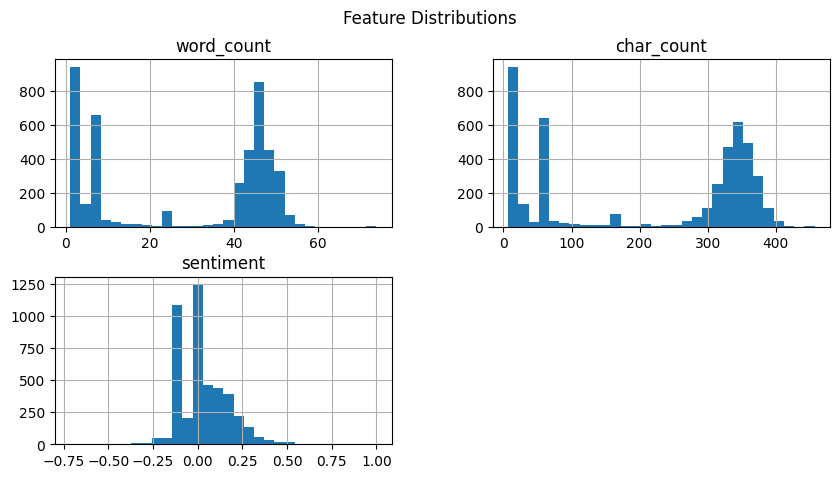

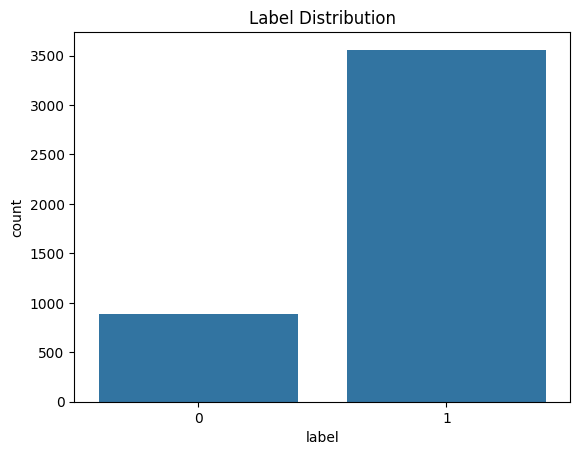

In [17]:
# 3. Data Visualization
# Plot histograms for numerical features
df[['word_count', 'char_count', 'sentiment']].hist(bins=30, figsize=(10, 5))
plt.suptitle("Feature Distributions")
plt.show()

# Class Distribution (for labels)
sns.countplot(x=df['label'])
plt.title("Label Distribution")
plt.show()

## Correlation Analysis & Heatmap


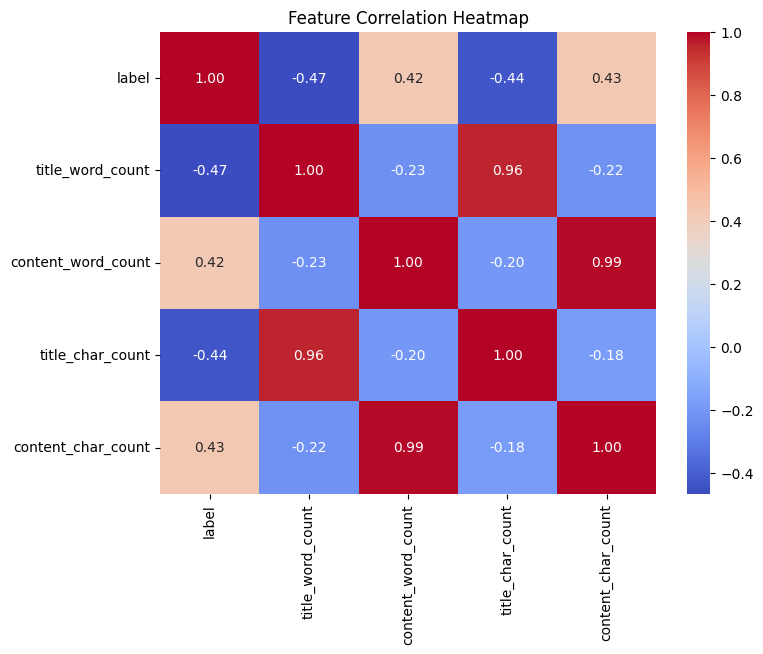

In [18]:
# Compute word and character count for title and content
df['title_word_count'] = df['title'].apply(lambda x: len(str(x).split()))
df['content_word_count'] = df['content'].apply(lambda x: len(str(x).split()))
df['title_char_count'] = df['title'].apply(lambda x: len(str(x)))
df['content_char_count'] = df['content'].apply(lambda x: len(str(x)))

# Now compute the correlation matrix
correlation_matrix = df[['label', 'title_word_count', 'content_word_count', 
                         'title_char_count', 'content_char_count']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


## Skewness Check

In [19]:
# Compute skewness
skewness = df[['title_word_count', 'content_word_count', 'title_char_count', 'content_char_count']].skew()
print('Skewness of Features:')
print(skewness)

Skewness of Features:
title_word_count      2.135327
content_word_count   -0.280554
title_char_count      2.189931
content_char_count   -0.279738
dtype: float64


## Model Building

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
data_file_path = r"C:\Users\Dee\OneDrive - Asia Pacific University\Desktop\fyp dataset\Merged_COVID19_Data.csv"
data = pd.read_csv(data_file_path)

# Preprocessing: Dropping rows with missing values in 'title' or 'content'
data_cleaned = data.dropna(subset=['title', 'content'])

# Create a text column combining title and content
data_cleaned['text'] = data_cleaned['title'] + ' ' + data_cleaned['content']

# Define features and target variable
X = data_cleaned['text']
y = data_cleaned['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorizing the text data using TF-IDF (Term Frequency-Inverse Document Frequency)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Check the shape of the resulting datasets
X_train_tfidf.shape, X_test_tfidf.shape


C:\Users\Dee\AppData\Local\Temp\ipykernel_14932\434976755.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['text'] = data_cleaned['title'] + ' ' + data_cleaned['content']


((2506, 5000), (1075, 5000))

1. Logistic Regression

Logistic Regression Best Hyperparameters: {'C': 10}
Accuracy: 0.95
Confusion Matrix:
[[ 90  47]
 [  5 933]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.66      0.78       137
           1       0.95      0.99      0.97       938

    accuracy                           0.95      1075
   macro avg       0.95      0.83      0.87      1075
weighted avg       0.95      0.95      0.95      1075



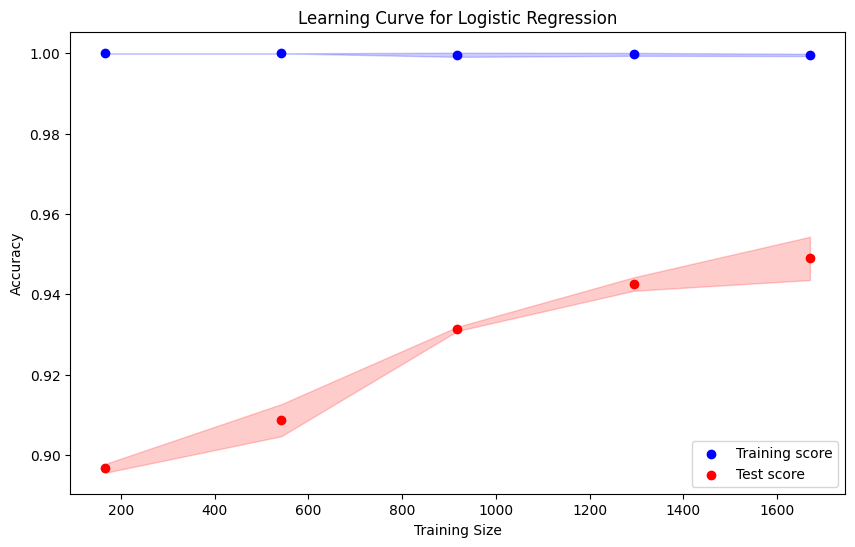

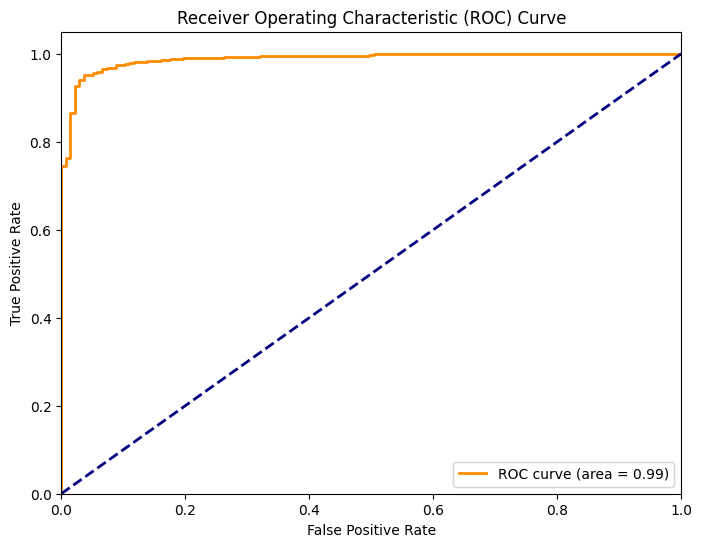

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Hyperparameter tuning with GridSearchCV
param_grid_log_reg = {'C': [0.1, 1, 10]}

grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_log_reg.fit(X_train_tfidf, y_train)

# Best model after tuning
best_log_reg = grid_search_log_reg.best_estimator_

# Predictions using the best model
y_pred_log_reg = best_log_reg.predict(X_test_tfidf)

# Model evaluation
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
classification_report_log_reg = classification_report(y_test, y_pred_log_reg)

# Print accuracy, confusion matrix, classification report, and best hyperparameters
print(f"Logistic Regression Best Hyperparameters: {grid_search_log_reg.best_params_}")
print(f"Accuracy: {accuracy_log_reg:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_log_reg}")
print(f"Classification Report:\n{classification_report_log_reg}")

# Plotting the learning curve with dots
train_sizes, train_scores, test_scores = learning_curve(best_log_reg, X_train_tfidf, y_train, cv=3, n_jobs=-1)

# Calculate the mean and standard deviation for the learning curve
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plotting the learning curve with dots
plt.figure(figsize=(10, 6))
plt.scatter(train_sizes, train_mean, label="Training score", color="blue")
plt.scatter(train_sizes, test_mean, label="Test score", color="red")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)
plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_log_reg.predict_proba(X_test_tfidf)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


2. Naive Bayes

Naive Bayes Best Hyperparameters: {'alpha': 0.5}
Accuracy: 0.91
Confusion Matrix:
[[ 38  99]
 [  2 936]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.28      0.43       137
           1       0.90      1.00      0.95       938

    accuracy                           0.91      1075
   macro avg       0.93      0.64      0.69      1075
weighted avg       0.91      0.91      0.88      1075



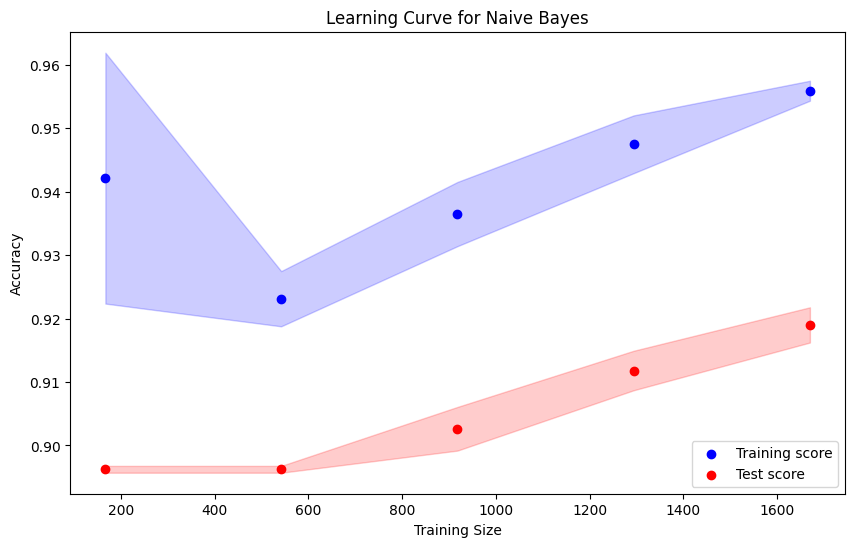

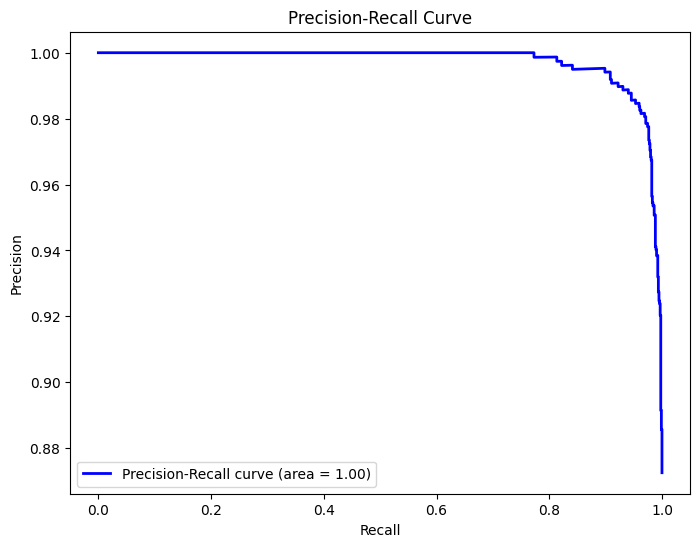

In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_curve, average_precision_score

# Initialize Naive Bayes model
naive_bayes = MultinomialNB()

# Hyperparameter tuning with GridSearchCV
param_grid_nb = {'alpha': [0.5, 1, 2]}

grid_search_nb = GridSearchCV(naive_bayes, param_grid_nb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_nb.fit(X_train_tfidf, y_train)

# Best model after tuning
best_nb = grid_search_nb.best_estimator_

# Predictions using the best model
y_pred_nb = best_nb.predict(X_test_tfidf)

# Model evaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)

# Print accuracy, confusion matrix, classification report, and best hyperparameters
print(f"Naive Bayes Best Hyperparameters: {grid_search_nb.best_params_}")
print(f"Accuracy: {accuracy_nb:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_nb}")
print(f"Classification Report:\n{classification_report_nb}")

# Plotting the learning curve with dots
train_sizes, train_scores, test_scores = learning_curve(best_nb, X_train_tfidf, y_train, cv=3, n_jobs=-1)

# Calculate the mean and standard deviation for the learning curve
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plotting the learning curve with dots
plt.figure(figsize=(10, 6))
plt.scatter(train_sizes, train_mean, label="Training score", color="blue")
plt.scatter(train_sizes, test_mean, label="Test score", color="red")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)
plt.title("Learning Curve for Naive Bayes")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, best_nb.predict_proba(X_test_tfidf)[:, 1])
average_precision = average_precision_score(y_test, best_nb.predict_proba(X_test_tfidf)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall curve (area = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


3. Random Forest

Random Forest Best Hyperparameters: {'max_depth': 20, 'n_estimators': 150}
Accuracy: 0.89
Confusion Matrix:
[[ 21 116]
 [  0 938]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.15      0.27       137
           1       0.89      1.00      0.94       938

    accuracy                           0.89      1075
   macro avg       0.94      0.58      0.60      1075
weighted avg       0.90      0.89      0.86      1075



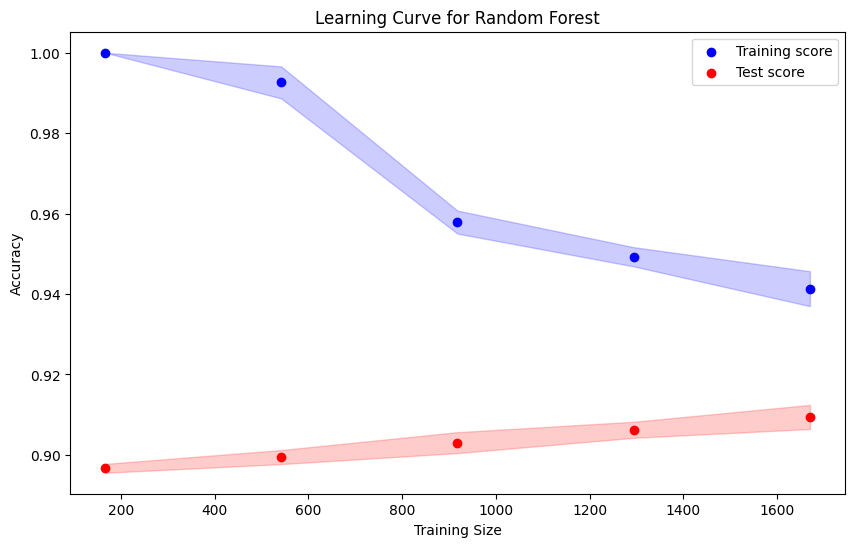

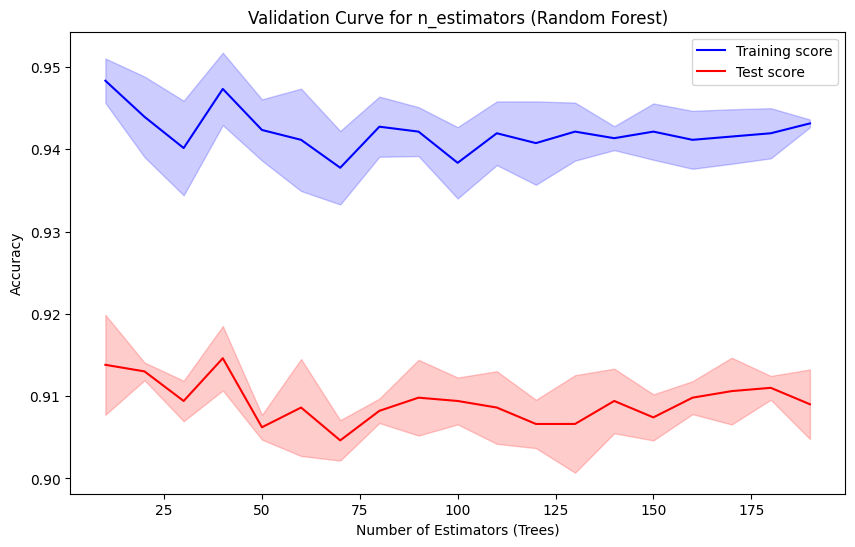

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
import numpy as np

# Initialize Random Forest model
rf = RandomForestClassifier()

# Hyperparameter tuning with GridSearchCV
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [10, 20]}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_tfidf, y_train)

# Best model after tuning
best_rf = grid_search_rf.best_estimator_

# Predictions using the best model
y_pred_rf = best_rf.predict(X_test_tfidf)

# Model evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

# Print accuracy, confusion matrix, classification report, and best hyperparameters
print(f"Random Forest Best Hyperparameters: {grid_search_rf.best_params_}")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")
print(f"Classification Report:\n{classification_report_rf}")

# Plotting the learning curve with dots
train_sizes, train_scores, test_scores = learning_curve(best_rf, X_train_tfidf, y_train, cv=3, n_jobs=-1)

# Calculate the mean and standard deviation for the learning curve
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plotting the learning curve with dots
plt.figure(figsize=(10, 6))
plt.scatter(train_sizes, train_mean, label="Training score", color="blue")
plt.scatter(train_sizes, test_mean, label="Test score", color="red")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)
plt.title("Learning Curve for Random Forest")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

# Validation Curve for n_estimators
param_range = np.arange(10, 200, 10)
train_scores, test_scores = validation_curve(
    RandomForestClassifier(max_depth=20), X_train_tfidf, y_train, param_name="n_estimators", param_range=param_range, cv=3, scoring="accuracy", n_jobs=-1
)

# Calculate the mean and standard deviation for the validation curve
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plotting the validation curve for n_estimators
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="blue")
plt.plot(param_range, test_mean, label="Test score", color="red")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)
plt.title("Validation Curve for n_estimators (Random Forest)")
plt.xlabel("Number of Estimators (Trees)")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()


4. Support Vector Machine (SVM)

SVM Best Hyperparameters: {'C': 10, 'kernel': 'linear'}
Accuracy: 0.96
Confusion Matrix:
[[104  33]
 [  8 930]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       137
           1       0.97      0.99      0.98       938

    accuracy                           0.96      1075
   macro avg       0.95      0.88      0.91      1075
weighted avg       0.96      0.96      0.96      1075



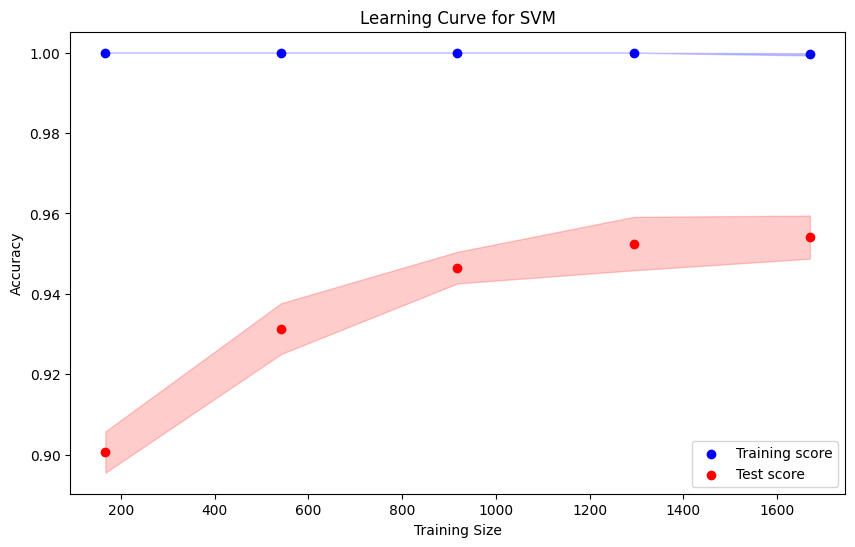

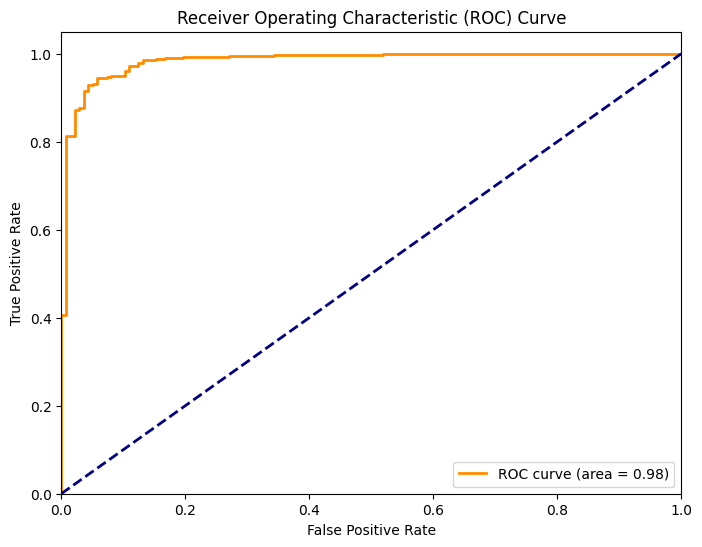

In [65]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

# Initialize SVM model
svm = SVC(probability=True)

# Hyperparameter tuning with GridSearchCV
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train_tfidf, y_train)

# Best model after tuning
best_svm = grid_search_svm.best_estimator_

# Predictions using the best model
y_pred_svm = best_svm.predict(X_test_tfidf)

# Model evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

# Print accuracy, confusion matrix, classification report, and best hyperparameters
print(f"SVM Best Hyperparameters: {grid_search_svm.best_params_}")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_svm}")
print(f"Classification Report:\n{classification_report_svm}")

# Plotting the learning curve with dots
train_sizes, train_scores, test_scores = learning_curve(best_svm, X_train_tfidf, y_train, cv=3, n_jobs=-1)

# Calculate the mean and standard deviation for the learning curve
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plotting the learning curve with dots
plt.figure(figsize=(10, 6))
plt.scatter(train_sizes, train_mean, label="Training score", color="blue")
plt.scatter(train_sizes, test_mean, label="Test score", color="red")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)
plt.title("Learning Curve for SVM")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_svm.predict_proba(X_test_tfidf)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Model Deployment

1. Save Trained Models

In [4]:
import joblib

# Save the best Random Forest model to a file
joblib.dump(best_rf, 'best_random_forest_model.pkl')

# Save the TF-IDF vectorizer (this is important to apply the same transformation during prediction)
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

NameError: name 'best_rf' is not defined

In [6]:
import streamlit as st
import joblib
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load the pre-trained model and vectorizer using joblib
best_rf = joblib.load(r'C:\Users\Dee\OneDrive - Asia Pacific University\Desktop\fyp dataset\best_random_forest_model.pkl')
vectorizer = joblib.load(r'C:\Users\Dee\OneDrive - Asia Pacific University\Desktop\fyp dataset\tfidf_vectorizer.pkl')

# Initialize stopwords and lemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocess the input text
def preprocess_text(text):
    text = text.lower()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

# Streamlit form layout for user input (like the flight delay prediction system)
with st.form("news_form"):
    st.header("Fake News Detection System")
    
    # Input fields for the form
    article_title = st.text_input("Enter the Title of the News Article")
    article_content = st.text_area("Enter the Content of the News Article")
    
    # Submit button
    submit_button = st.form_submit_button("Predict")

if submit_button:
    # Preprocess the article content
    processed_content = preprocess_text(article_content)
    
    # Vectorize the content
    vectorized_text = vectorizer.transform([processed_content]).toarray()
    
    # Make the prediction
    prediction = best_rf.predict(vectorized_text)
    
    # Display the prediction
    if prediction == 1:
        st.write("🚨 This is Fake News! 🚨")
    else:
        st.write("✅ This is Real News. ✅")



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2025-07-14 15:28:37.609 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 15:28:37.616 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 15:28:37.619 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 15:28:37.620 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 15:28:37.622 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 15:28:37.624 Thread 'MainThread': missing Scrip

In [ ]:
!streamlit run app.py